In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [2]:
# Load the trajectory
traj = md.load_trr('../Inputs/T300/adp_exchange4temps.trr', top='../Inputs/T300/adp_exchange4temps.gro')

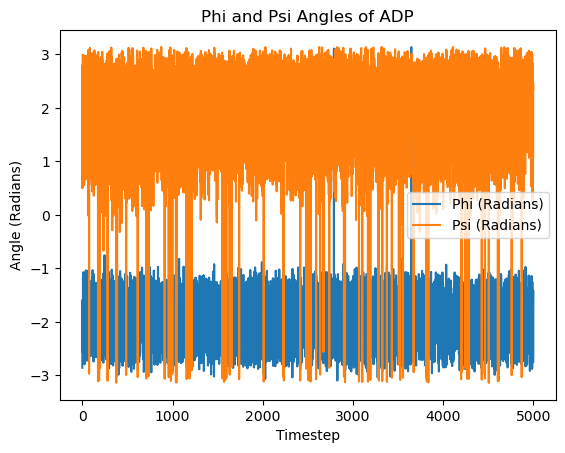

<Figure size 640x480 with 0 Axes>

In [3]:
#Compute the phi and psi angles of the trajectory
phi, psi = md.compute_phi(traj), md.compute_psi(traj)

#Plot the phi and psi angles versus timestep
plt.plot(phi[1][:,0], label='Phi (Radians)')
plt.plot(psi[1][:,0], label='Psi (Radians)')
plt.legend()
plt.xlabel('Timestep')
plt.ylabel('Angle (Radians)')
plt.title('Phi and Psi Angles of ADP')
plt.show()

#Save the figure as a png in ../Folders
plt.savefig('../Figures/ADP_Phi_Psi_Part2T300.png')


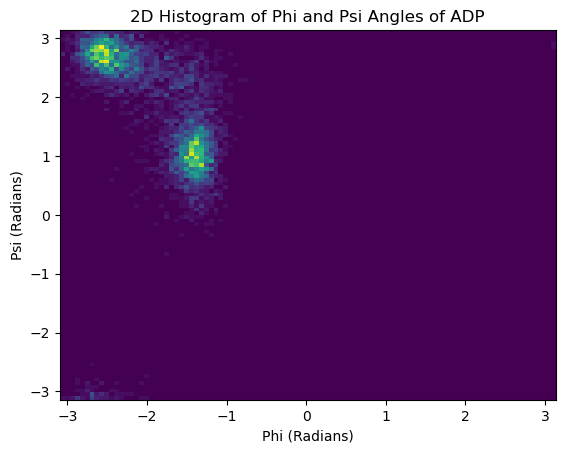

<Figure size 640x480 with 0 Axes>

In [4]:
#Plot a 2d histogram of the phi and psi angles
plt.hist2d(phi[1][:,0], psi[1][:,0], bins=100)
plt.xlabel('Phi (Radians)')
plt.ylabel('Psi (Radians)')
plt.title('2D Histogram of Phi and Psi Angles of ADP')
plt.show()

#Save the figure as a png in ../Folders
plt.savefig('../Figures/ADP_2D_Histogram_Part2T300.png')

/tmp/ipykernel_4000761/3988088163.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(-np.log(hist), interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])


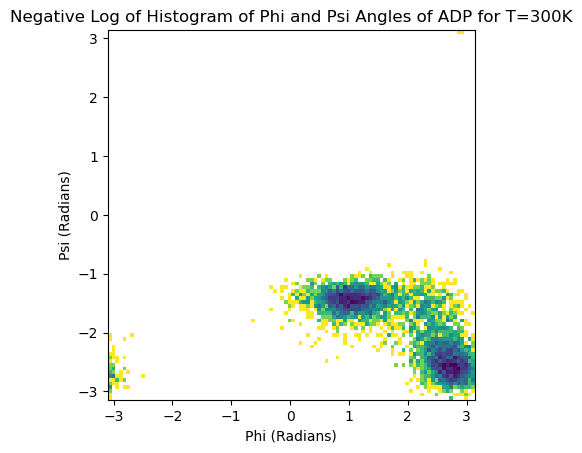

In [5]:
#Comptue 2d histogram of the phi and psi angles
hist, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=100)

#Plot the negative log of the 2d histogram
plt.imshow(-np.log(hist), interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel('Phi (Radians)')
plt.ylabel('Psi (Radians)')
plt.title('Negative Log of Histogram of Phi and Psi Angles of ADP for T=300K')

#Save the figure as a png in ../Figures
plt.savefig('../Figures/ADP_Negative_Log_Histogram.png')

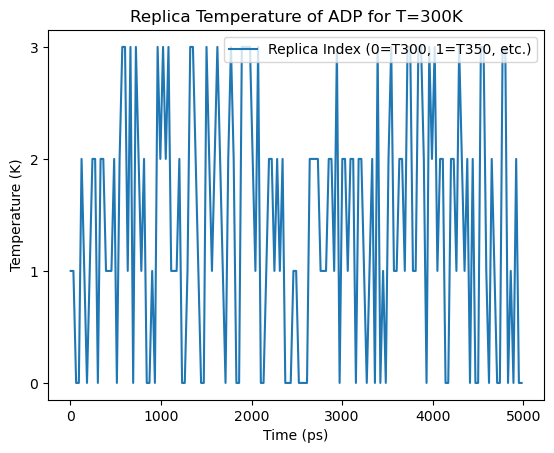

In [6]:
#Read in the data from ../Data/replica_temp.xvg to see how replica switching is occuring
replica_index = np.genfromtxt('../Data/replica_index.xvg', skip_header=25)
#Plot the replica temperature versus time every 300 steps
plt.plot(replica_index[::300,0], replica_index[::300,1], label='Replica Index (0=T300, 1=T350, etc.)')
plt.yticks([0,1,2,3])
plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.legend(loc='upper right')
plt.title('Replica Temperature of ADP for T=300K')

#Save the figure as a png in ../Figures
plt.savefig('../Figures/ADP_Replica_Temperature.png')

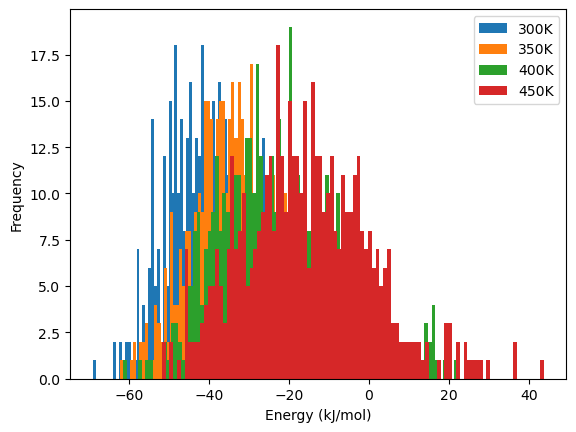

<Figure size 640x480 with 0 Axes>

In [7]:
#Load in the energy files from each replica run
T300_energy = np.loadtxt('../Data/energy_T300.xvg',comments=["@","#"],unpack=True)
T350_energy = np.loadtxt('../Data/energy_T350.xvg',comments=["@","#"],unpack=True)
T400_energy = np.loadtxt('../Data/energy_T400.xvg',comments=["@","#"],unpack=True)
T450_energy = np.loadtxt('../Data/energy_T450.xvg',comments=["@","#"],unpack=True)

#Plot a histogram of the energy of each replica run on the same plot
plt.hist(T300_energy[1], bins=100, label='300K')
plt.hist(T350_energy[1], bins=100, label='350K')
plt.hist(T400_energy[1], bins=100, label='400K')
plt.hist(T450_energy[1], bins=100, label='450K')
plt.xlabel('Energy (kJ/mol)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Save the figure as a png in ../Figures
plt.savefig('../Figures/ADP_Energy_Histogram_Part2T300-450.png')

In [8]:
#They do overlap well!